## IMPORTING NECESSARY LIBRARIES

In [57]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## LOADING DATASETS

> *1. Apple OHLCV Dataset*

In [2]:
df = pd.read_csv("Datasets/aapl_preprocessed.csv")

In [3]:
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Day Gap
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0,0.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0,3.0


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index(df['Date'])
df.drop(columns=["Date"], inplace=True)

In [5]:
df.tail(2)

,Open,High,Low,Close,Adj Close,Volume,Day Gap
Date,,,,,,,
2019-11-22,262.589996,263.179993,260.839996,261.779999,261.779999,16331300.0,1.0
2019-11-25,262.709991,266.440002,262.519989,266.369995,266.369995,21005100.0,3.0


In [6]:
df.shape

(9823, 7)

> *2. Macroeconomics Indicator Dataset*

In [7]:
mac = pd.read_csv("Datasets/macroeconomic_data_1980_to_2019.csv")

In [8]:
mac.head(2)

,Date,CPI,FED_FUNDS,GDP,NASDAQ_Comp_Close,NASDAQ100_Adj_Close,SOX_Adj_Close,S&P500_Close,VIX_Adj_Close
0,1980-01-01,78.0,13.82,7341.557,0.000000,0.0,0.0,0.000000,0.0
1,1980-01-02,78.0,13.82,7341.557,148.169998,0.0,0.0,105.760002,0.0


In [9]:
mac['Date'] = pd.to_datetime(mac['Date'])
mac = mac.set_index(mac['Date'])
mac.drop(columns=["Date"], inplace=True)

In [10]:
mac.tail(2)

,CPI,FED_FUNDS,GDP,NASDAQ_Comp_Close,NASDAQ100_Adj_Close,SOX_Adj_Close,S&P500_Close,VIX_Adj_Close
Date,,,,,,,,
2019-11-22,257.879,1.55,20985.448,8519.879883,8272.049805,1690.790039,3110.290039,12.34
2019-11-25,257.879,1.55,20985.448,8632.490234,8371.929688,1731.949951,3133.639893,11.87


> *3. News and Social Sentiment Trends*

In [17]:
s = pd.read_csv("Datasets/finbert_news_score.csv")

In [18]:
s.head(2)

,Date,news_sentiment
0,1988-03-02 00:00:00,0.998569
1,1988-06-07 00:00:00,0.999573


In [19]:
s['Date'] = pd.to_datetime(s['Date'])
s['Date'] = s['Date'].dt.date

In [20]:
s.tail(2)

,Date,news_sentiment
486,2019-12-18,0.999370
487,2019-12-26,0.974359


In [21]:
s.shape

(488, 2)

In [22]:
ss = pd.read_csv("Datasets/finbert_social_sentiment.csv")

In [23]:
ss.drop(columns=["Unnamed: 0"], inplace=True)

In [24]:
ss.head()

,Date,social_sentiment
0,2014-12-01,0.964340
1,2014-12-02,0.978057
2,2014-12-03,0.972873
3,2014-12-04,0.980858
4,2014-12-05,0.980136


In [25]:
ss['Date'] = pd.to_datetime(ss['Date'])
ss['Date'] = ss['Date'].dt.date
ss.shape

(1165, 2)

In [26]:
# Renaming both sentiments

s.rename(columns={"news_sentiment" : "sentiment_score"}, inplace=True)
ss.rename(columns={"social_sentiment" : "sentiment_score"}, inplace=True)

In [27]:
score = pd.concat([s, ss])

In [28]:
score.shape

(1653, 2)

In [29]:
# Convert Date column to datetime first
score['Date'] = pd.to_datetime(score['Date'])

# Set it as index
score.set_index('Date', inplace=True)

In [30]:
score.head(1)

,sentiment_score
Date,
1988-03-02,0.998569


In [31]:
score.index.isin(df.index).any()

True

In [32]:
score.duplicated().sum()

23

In [33]:
# Take the mean of all columns for duplicated indexes
score_avg = score.groupby(score.index).mean()
score_avg = score_avg.reset_index()

In [34]:
duplicates = score_avg.index[score_avg.index.duplicated()]
print(duplicates)

Index([], dtype='int64')


In [35]:
# Convert Date column to datetime first
score_avg['Date'] = pd.to_datetime(score_avg['Date'])

# Set it as index
score_avg.set_index('Date', inplace=True)

# MERGING DATA ENHANCEMENT FEATURES

In [36]:
final = df.join(mac, how='left')

In [37]:
final = final.join(score_avg, how='left')

In [38]:
final.head()

,Open,High,Low,Close,Adj Close,Volume,Day Gap,CPI,FED_FUNDS,GDP,NASDAQ_Comp_Close,NASDAQ100_Adj_Close,SOX_Adj_Close,S&P500_Close,VIX_Adj_Close,sentiment_score
Date,,,,,,,,,,,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0,0.0,86.4,18.9,7315.677,191.220001,0.0,0.0,129.229996,0.0,NaN
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0,3.0,86.4,18.9,7315.677,194.020004,0.0,0.0,129.449997,0.0,NaN
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.358108,26432000.0,1.0,86.4,18.9,7315.677,191.880005,0.0,0.0,130.600006,0.0,NaN
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366972,21610400.0,1.0,86.4,18.9,7315.677,194.020004,0.0,0.0,132.889999,0.0,NaN
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.377609,18362400.0,1.0,86.4,18.9,7315.677,196.009995,0.0,0.0,133.000000,0.0,NaN


In [39]:
final.isnull().sum()

Open                      0
High                      0
Low                       0
Close                     0
Adj Close                 0
Volume                    0
Day Gap                   0
CPI                       0
FED_FUNDS                 0
GDP                       0
NASDAQ_Comp_Close         0
NASDAQ100_Adj_Close       0
SOX_Adj_Close             0
S&P500_Close              0
VIX_Adj_Close             0
sentiment_score        8803
dtype: int64

In [40]:
final.shape

(9823, 16)

# FEATURE ENGINEERING

> *Trading Volume Trends*

In [41]:
# Volume Moving Average

final['Vol_SMA_10'] = final['Volume'].rolling(window=10, min_periods=1).mean()

In [42]:
# Volume Spike Ratio

final['Vol_Ratio'] = final['Volume'] / final['Vol_SMA_10']

In [43]:
# On Balance Volume

final['OBV'] = (np.sign(final['Close'].diff()) * final['Volume']).fillna(0).cumsum()

In [44]:
new_indices = final.index.difference(df.index)
new_indices

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [45]:
final.tail()

,Open,High,Low,Close,Adj Close,Volume,Day Gap,CPI,FED_FUNDS,GDP,NASDAQ_Comp_Close,NASDAQ100_Adj_Close,SOX_Adj_Close,S&P500_Close,VIX_Adj_Close,sentiment_score,Vol_SMA_10,Vol_Ratio,OBV
Date,,,,,,,,,,,,,,,,,,,
2019-11-19,267.899994,268.000000,265.390015,266.290009,266.290009,19041800.0,1.0,257.879,1.55,20985.448,8570.660156,8338.740234,1730.500000,3120.179932,12.86,0.968365,21624880.0,0.880551,3.943116e+10
2019-11-20,265.540009,266.079987,260.399994,263.190002,263.190002,26558600.0,1.0,257.879,1.55,20985.448,8526.730469,8283.750000,1710.140015,3108.459961,12.78,0.963248,22384130.0,1.186492,3.940460e+10
2019-11-21,263.690002,264.010010,261.179993,262.010010,262.010010,30348800.0,1.0,257.879,1.55,20985.448,8506.209961,8265.620117,1690.829956,3103.540039,13.13,0.972141,23045500.0,1.316908,3.937425e+10
2019-11-22,262.589996,263.179993,260.839996,261.779999,261.779999,16331300.0,1.0,257.879,1.55,20985.448,8519.879883,8272.049805,1690.790039,3110.290039,12.34,0.972565,22928970.0,0.712256,3.935792e+10
2019-11-25,262.709991,266.440002,262.519989,266.369995,266.369995,21005100.0,3.0,257.879,1.55,20985.448,8632.490234,8371.929688,1731.949951,3133.639893,11.87,0.982338,22983950.0,0.913903,3.937892e+10


# EDA

*DATA QUALITY CHECKS*

In [46]:
final.isnull().sum()

Open                      0
High                      0
Low                       0
Close                     0
Adj Close                 0
Volume                    0
Day Gap                   0
CPI                       0
FED_FUNDS                 0
GDP                       0
NASDAQ_Comp_Close         0
NASDAQ100_Adj_Close       0
SOX_Adj_Close             0
S&P500_Close              0
VIX_Adj_Close             0
sentiment_score        8803
Vol_SMA_10                0
Vol_Ratio                 0
OBV                       0
dtype: int64

In [47]:
final.index.is_monotonic_increasing

True

In [48]:
# Masking for sentiment availability flag

final['sentiment_avail'] = (~final['sentiment_score'].isna()).astype(int)

In [49]:
final['sentiment_score'] = final['sentiment_score'].fillna(0)

In [50]:
final.isna().sum()

Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
Volume                 0
Day Gap                0
CPI                    0
FED_FUNDS              0
GDP                    0
NASDAQ_Comp_Close      0
NASDAQ100_Adj_Close    0
SOX_Adj_Close          0
S&P500_Close           0
VIX_Adj_Close          0
sentiment_score        0
Vol_SMA_10             0
Vol_Ratio              0
OBV                    0
sentiment_avail        0
dtype: int64

In [51]:
final.to_csv("Datasets/AAPL_feature_enhancements.csv")

*UNIVARIATE ANALYSIS*

In [52]:
final.describe()

,Open,High,Low,Close,Adj Close,Volume,Day Gap,CPI,FED_FUNDS,GDP,NASDAQ_Comp_Close,NASDAQ100_Adj_Close,SOX_Adj_Close,S&P500_Close,VIX_Adj_Close,sentiment_score,Vol_SMA_10,Vol_Ratio,OBV,sentiment_avail
count,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9.823000e+03,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9.823000e+03,9823.000000,9.823000e+03,9823.000000
mean,30.347012,30.637559,30.045284,30.349895,28.361181,8.619984e+07,1.448336,173.189891,4.479586,13610.857544,2111.888564,1743.593919,350.883546,1015.276844,14.700506,0.099375,8.622044e+07,1.012265,1.782811e+10,0.103838
std,53.441148,53.906480,52.981806,53.462401,51.601737,8.623007e+07,0.874160,49.421986,3.847808,3960.802537,1957.056571,1905.523428,368.897651,733.825816,10.557637,0.292354,7.188067e+07,0.472659,1.533178e+10,0.305066
min,0.198661,0.198661,0.196429,0.196429,0.156008,3.472000e+05,0.000000,86.400000,0.070000,7295.631000,159.139999,0.000000,0.000000,102.419998,0.000000,0.000000,2.221520e+06,0.010586,-8.472926e+08,0.000000
25%,1.062500,1.085000,1.043214,1.066696,0.913734,3.318000e+07,1.000000,131.600000,1.150000,10029.510000,455.299988,223.037506,0.000000,347.235001,10.590000,0.000000,3.834068e+07,0.720389,3.998753e+09,0.000000
50%,1.709286,1.741429,1.671429,1.712857,1.452015,5.798800e+07,1.000000,171.200000,4.490000,14130.908000,1742.119995,1299.979980,323.163635,1020.619995,14.950000,0.000000,6.128444e+07,0.916161,1.380336e+10,0.000000
75%,30.387856,30.547143,29.865001,30.232143,26.305014,1.076306e+08,1.000000,217.463000,6.520000,16872.266000,2732.005005,2326.914917,495.950027,1377.445007,20.730000,0.000000,1.113902e+08,1.186630,3.661074e+10,0.000000
max,267.899994,268.000000,265.390015,267.100006,267.100006,1.855410e+09,7.000000,257.879000,19.100000,20985.448000,8632.490234,8371.929688,1742.930054,3133.639893,80.860001,1.000000,4.995738e+08,6.348384,4.208665e+10,1.000000


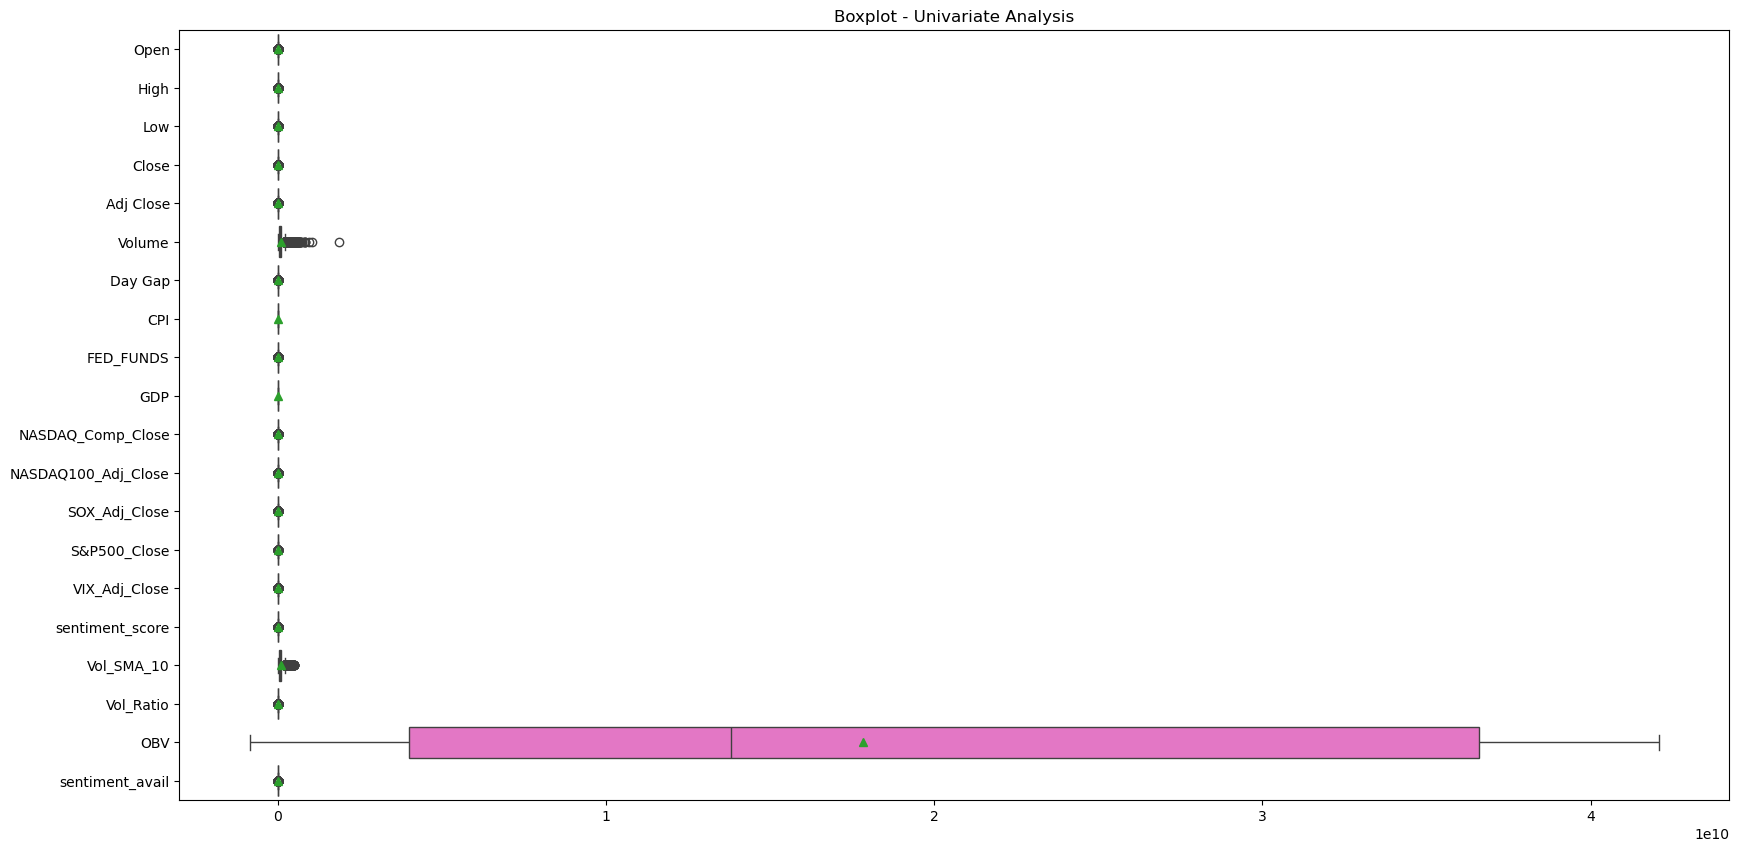

In [61]:
fig = plt.figure(figsize=(20,10))

sns.boxplot(data=final, orient='h', showmeans=True)
plt.title("Boxplot - Univariate Analysis")
plt.show()

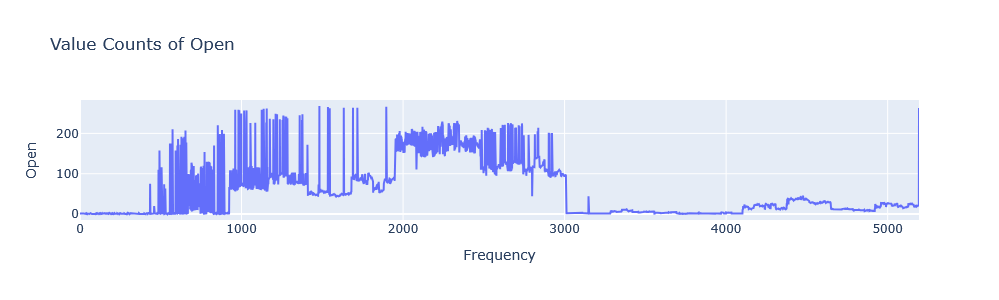

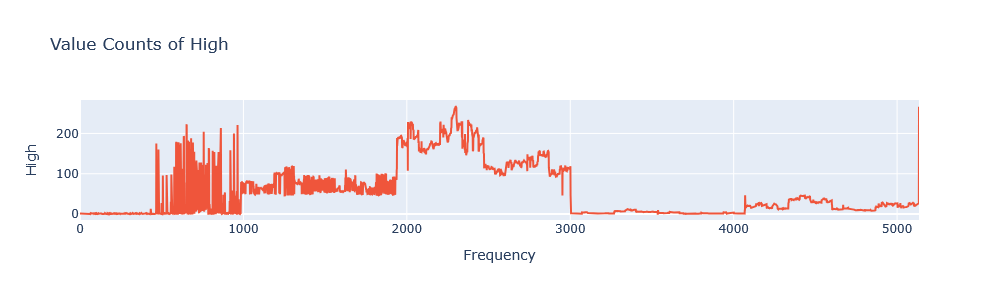

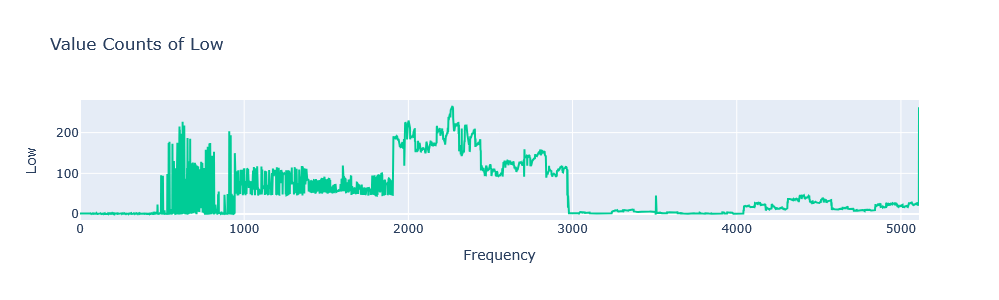

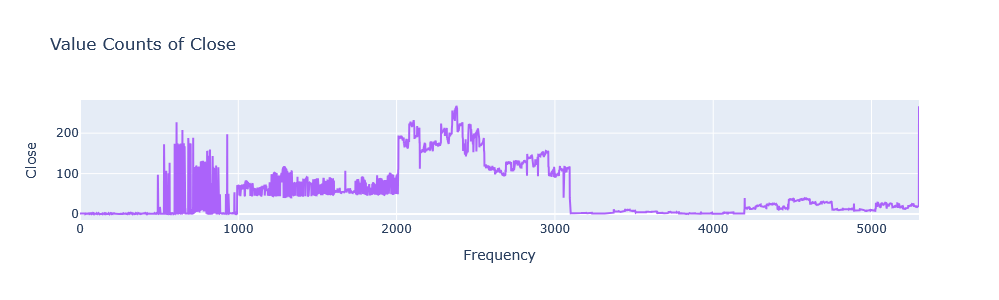

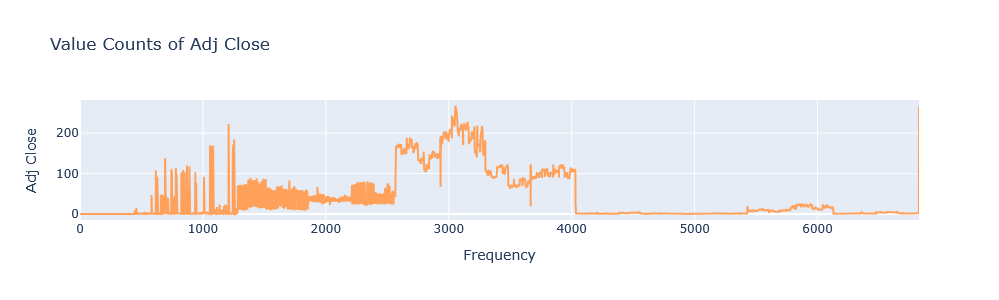

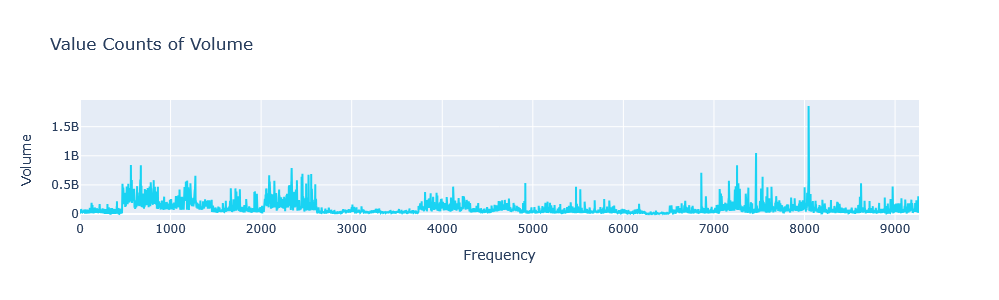

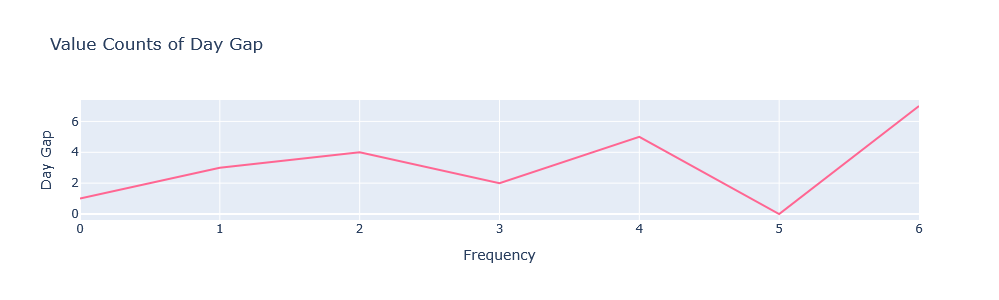

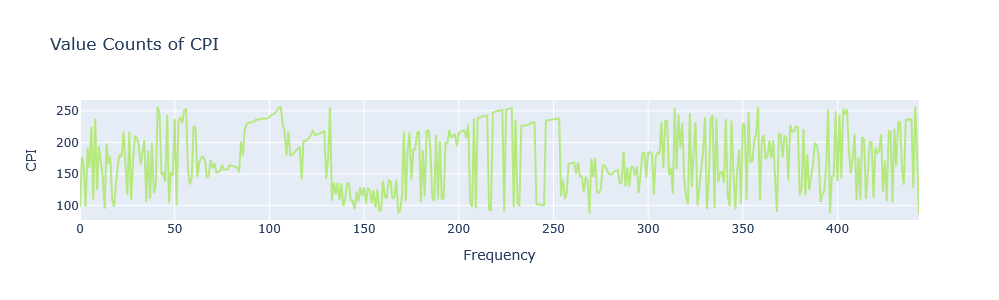

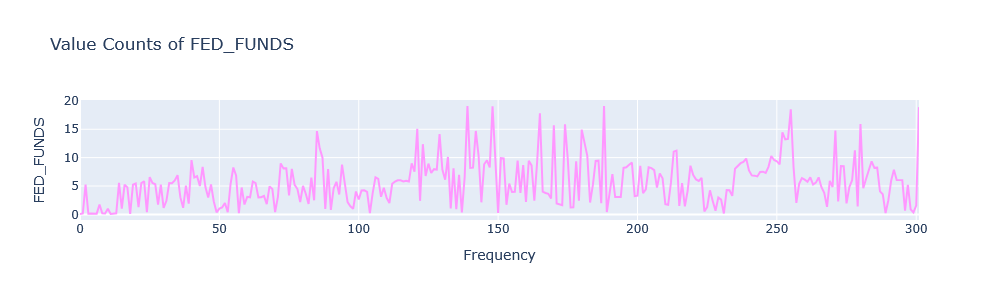

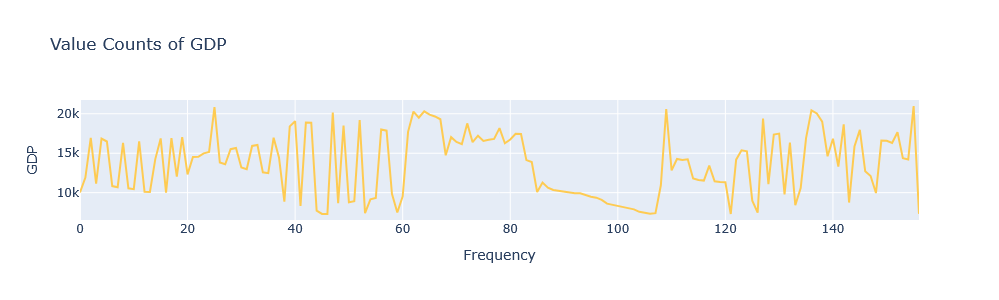

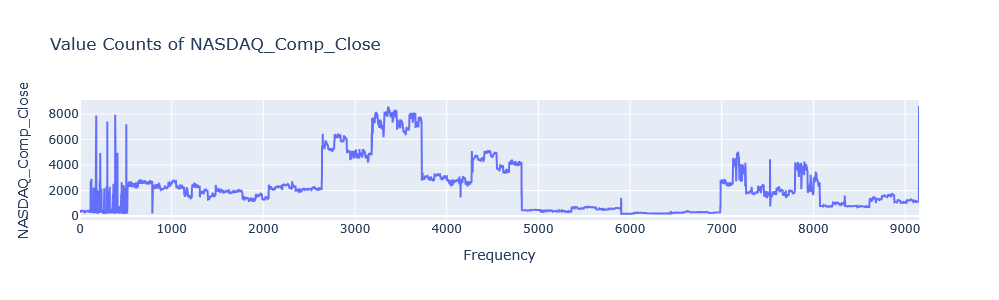

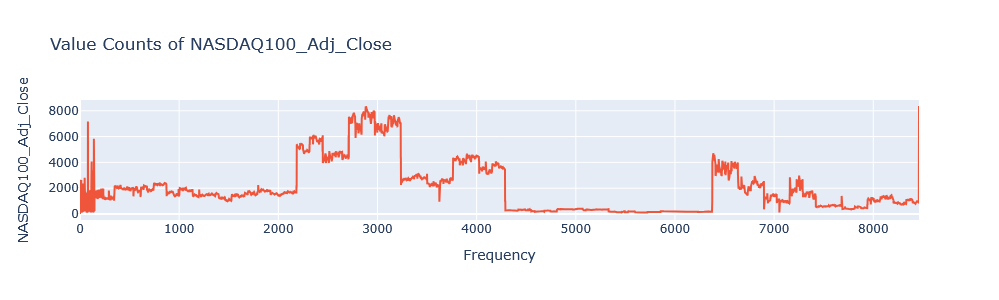

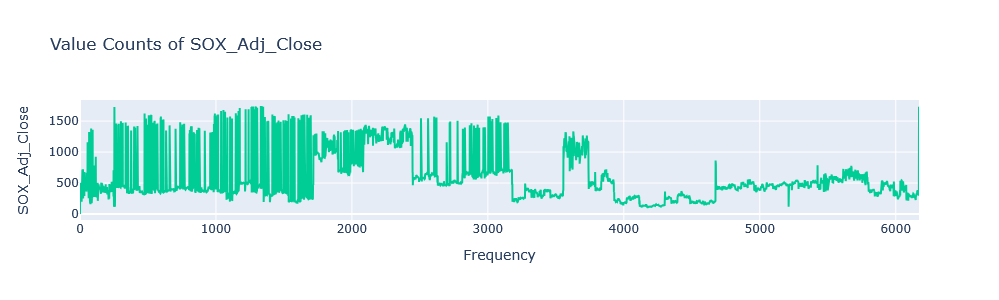

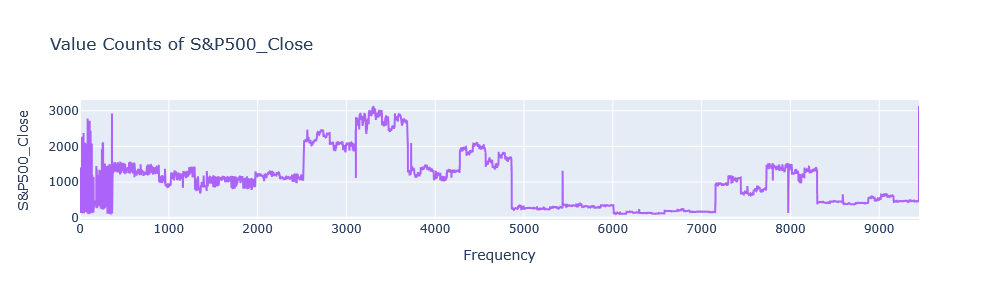

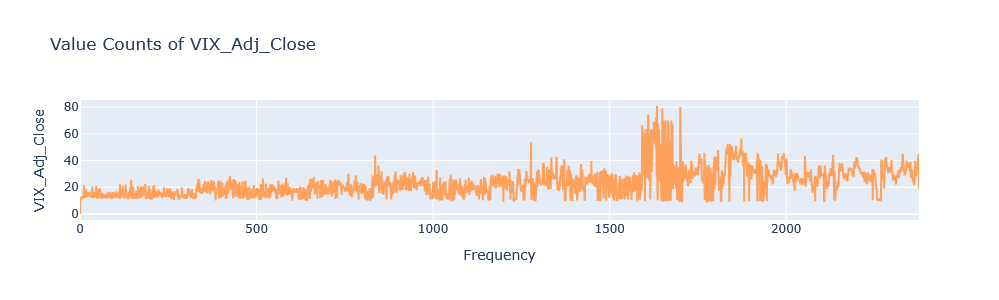

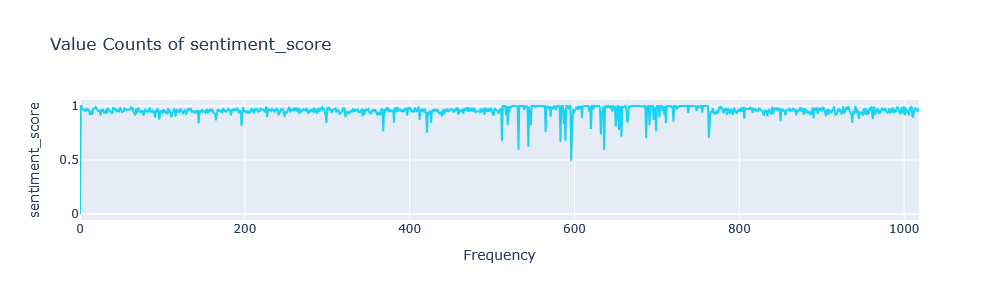

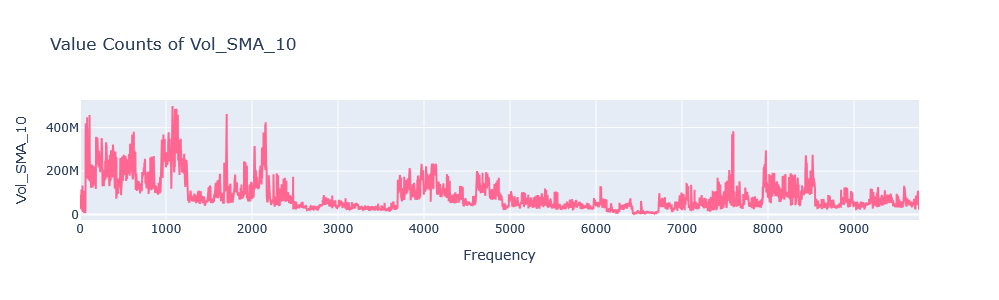

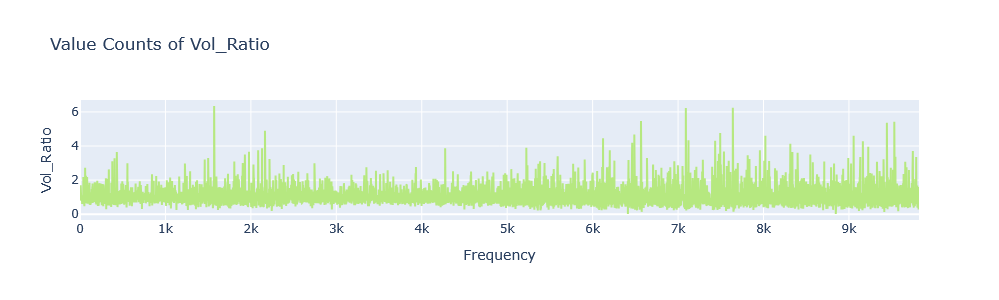

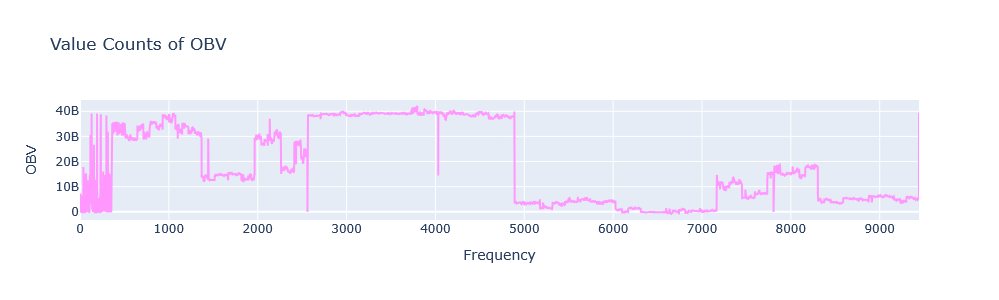

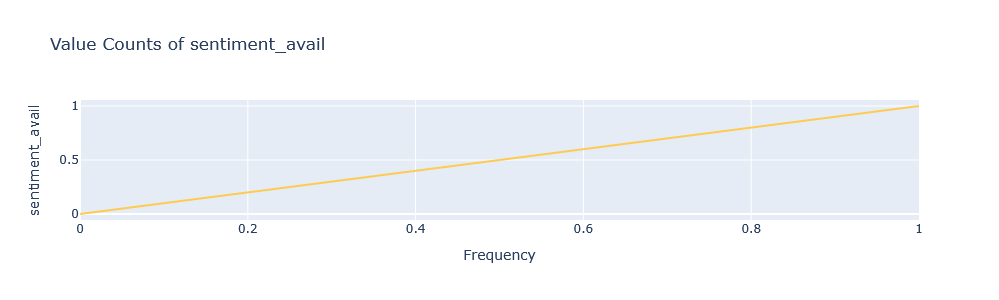

In [64]:
import plotly.express as px
import plotly.graph_objects as go

# Use Plotly's qualitative color palette
palette = px.colors.qualitative.Plotly
color_map = {col: palette[i % len(palette)] for i, col in enumerate(final.columns)}

for col in final.columns:
    counts = final[col].value_counts()
    
    fig = go.Figure(data=go.Scatter(
        y=counts.keys(), 
        mode='lines',
        line=dict(color=color_map[col], width=2),
        name=col
    ))
    
    fig.update_layout(
        title=f'Value Counts of {col}',
        yaxis_title=f'{col}',
        xaxis_title='Frequency',
        width=1000,
        height=300
    )

    fig.show()

BIVARIATE ANALYSIS

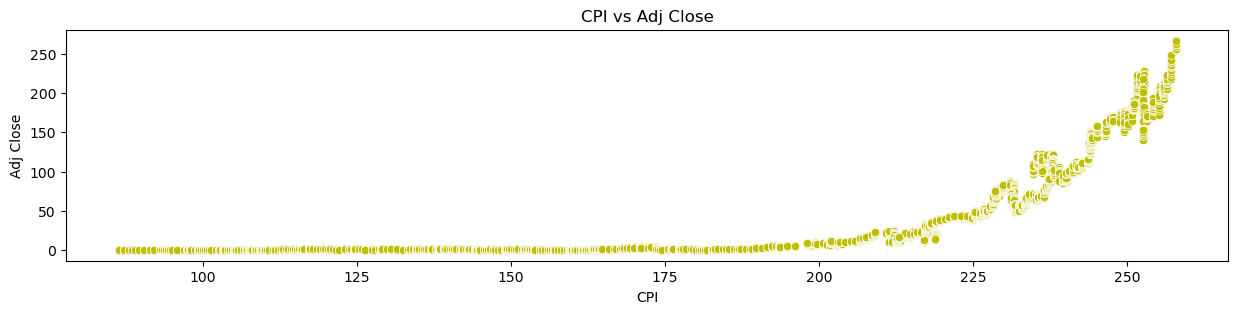

In [81]:
## Relationship between CPI and Adj Close

plt.figure(figsize=(15,3))
sns.scatterplot(data=final, x=final['CPI'], y=final['Adj Close'], color="y")
plt.title("CPI vs Adj Close")
plt.show()

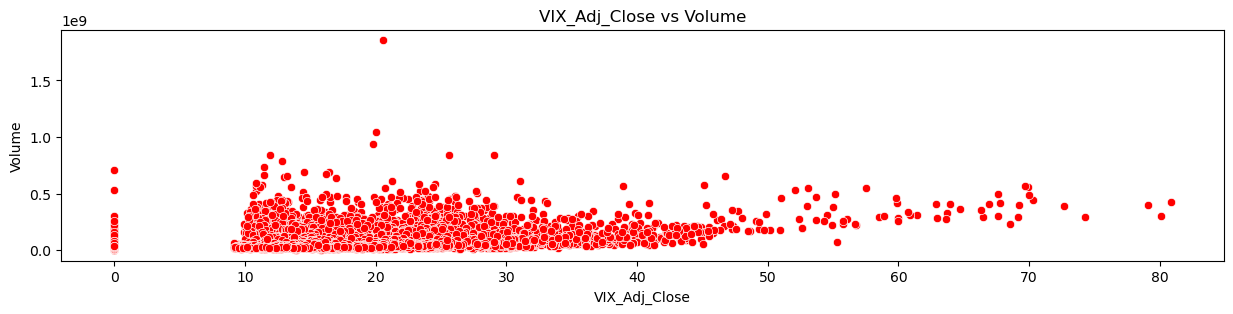

In [83]:
## Relationship between VIX_Adj_Close and Volume

plt.figure(figsize=(15,3))
sns.scatterplot(data=final, x=final['VIX_Adj_Close'], y=final['Volume'], color="r")
plt.title("VIX_Adj_Close vs Volume")
plt.show()

*MULTIVARIATE ANALYSIS*

In [73]:
corr_matrix = final.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
to_drop

['High',
 'Low',
 'Close',
 'Adj Close',
 'GDP',
 'NASDAQ_Comp_Close',
 'NASDAQ100_Adj_Close',
 'SOX_Adj_Close',
 'S&P500_Close',
 'OBV',
 'sentiment_avail']

In [76]:
f = final[[col for col in final.columns if col not in ["NASDAQ100_Adj_Close", "Vol_Ratio", "GDP", "OBV", "S&P500_Close", "SOX_Adj_Close"]]]

In [93]:
f.to_csv("Datasets/AAPL_features.csv")

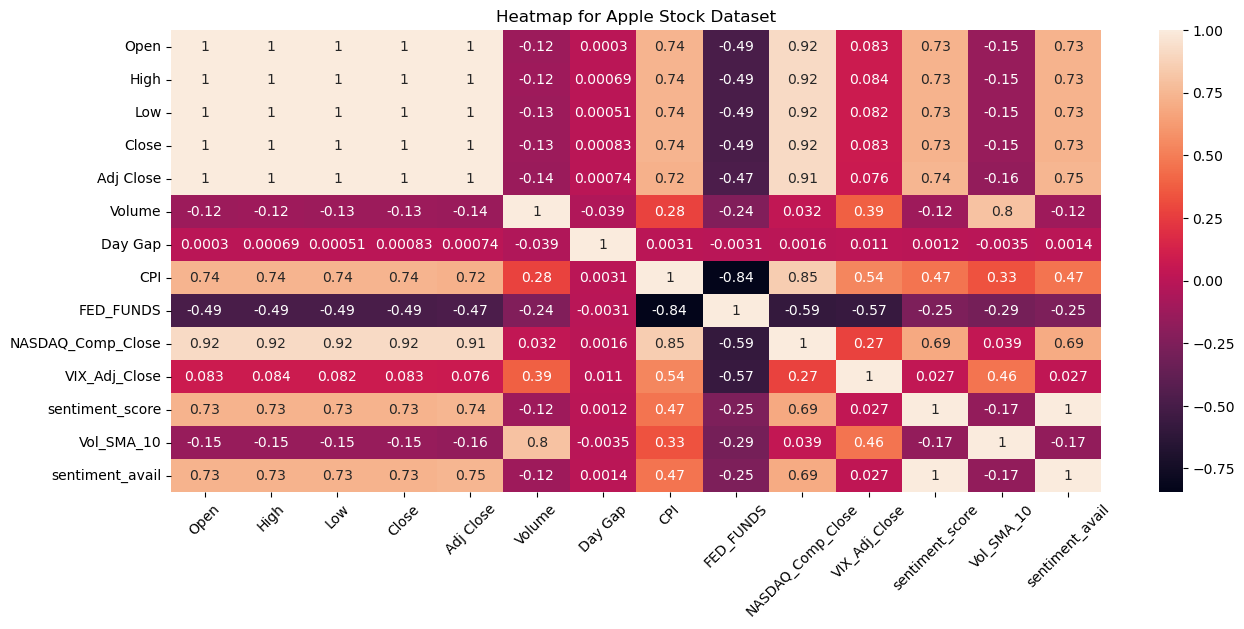

In [77]:
plt.figure(figsize=(15,6))
sns.heatmap(data=f.corr(), annot=True)
plt.title("Heatmap for Apple Stock Dataset")
plt.xticks(rotation=45)
plt.show()

*INFERENCE*

1. NASDAQ_Comp_Close & NASDAQ100_Adj_Close is 1

2. CPI with GDP has almost 1(0.99) and with OBV has 0.96 correlation

3. Vol_Ratio (low correlation, little signal)

# *Time-Series Analysis*

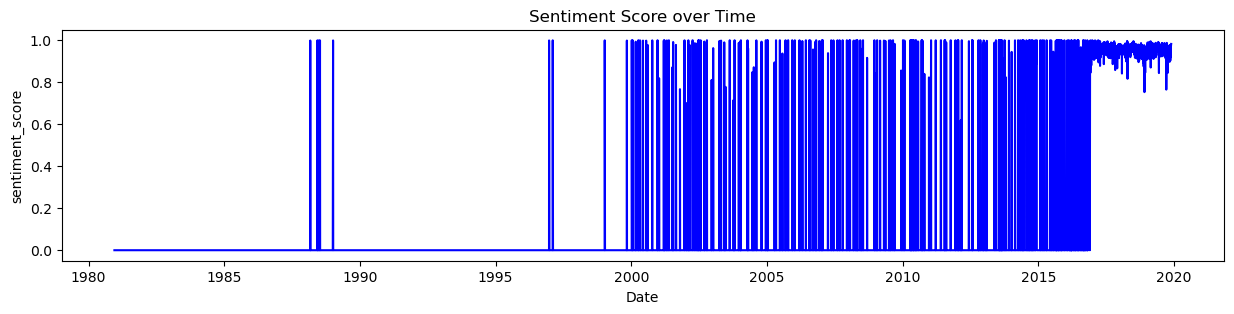

In [87]:
## Relationship between Sentiment Score and Time Period

plt.figure(figsize=(15,3))
sns.lineplot(data=final, x=final.index, y=final['sentiment_score'], color="b")
plt.title("Sentiment Score over Time")
plt.show()

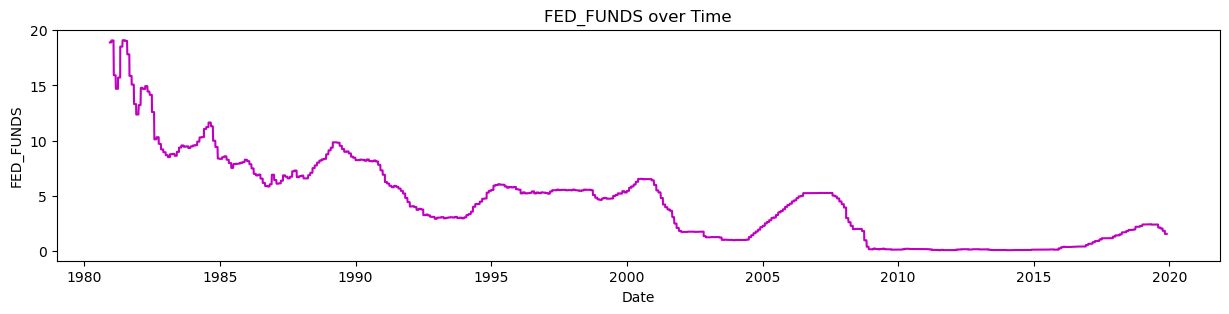

In [89]:
## Relationship between FED FUNDS and Time Period

plt.figure(figsize=(15,3))
sns.lineplot(data=final, x=final.index, y=final['FED_FUNDS'], color="m")
plt.title("FED_FUNDS over Time")
plt.show()

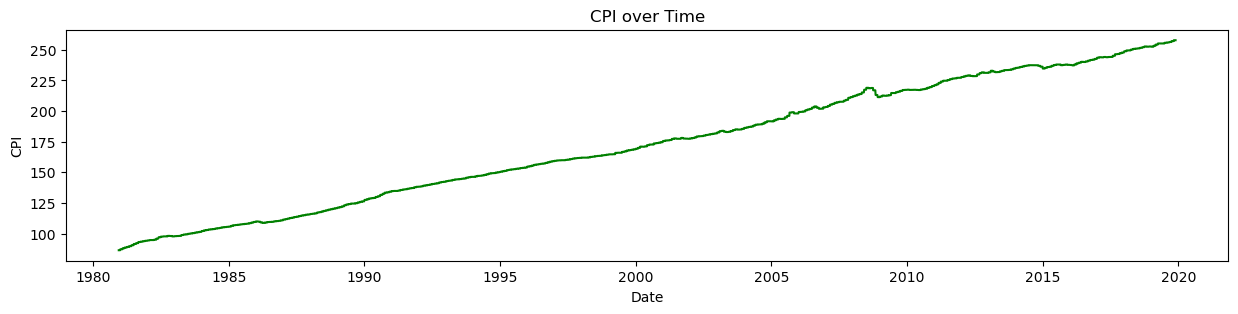

In [91]:
## Relationship between CPI and Time Period

plt.figure(figsize=(15,3))
sns.lineplot(data=final, x=final.index, y=final['CPI'], color="g")
plt.title("CPI over Time")
plt.show()